<a href="https://colab.research.google.com/github/yleessam/datascience/blob/main/20%EC%B0%A8%EC%8B%9C_%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 데이터분석 실습

# 순서
0. 데이터 확인
1. 필요 라이브러리 임포트 및 파일 읽어오기
2. EDA 탐색적 데이터 분석
3. 데이터 전처리 수행
 - 필요한 컬럼 정리
 - 컬럼 데이터 정제
 - Null 처리
 - 컬럼 type 변경하기
4. 데이터 시각화
5. 결과 저장

# #0. 데이터의 확인

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

- 통신사 고객 데이터를 분석해서 고객을 유지하고 고객 이탈률을 줄이기 위한 전략을 탐색한다.

- Churn은 서비스를 중단하거나 업계의 경쟁업체로 이전한 고객 또는 사용자를 의미하는데, 목표는 기존 고객을 유지하고 새로운 고객을 유치하는 것입니다.

- 이 과정을 통해 우리는 정확한 고객이탈 예측 모델을 개발할 수 있습니다.

# * Telco Customer Churn Dataset  컬럼

---


1. CustomerID: Customer ID unique for each customer
2. gender: Whether the customer is a male or a female
3. SeniorCitizen: Whether the customer is a senior citizen or not (1, 0) : 고령자 여부
4. Partner: Whether the customer has a partner or not (Yes, No)
5. Dependents: Whether the customer has dependents or not (Yes, No) : 부양가족 여부
6. Tenure: Number of months the customer has stayed with the company : 서비스 사용 개월수
7. PhoneService: Whether the customer has a phone service or not (Yes, No)
8. MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
9. InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
10. OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
11. OnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service)
12. DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
13. TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
14. StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
15. StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
16. Contract: The contract term of the customer (Month-to-month, One year, Two years)
17. PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
18. PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. MonthlyCharges: The amount charged to the customer monthly
20. TotalCharges: The total amount charged to the customer
21. Churn: Whether the customer churned or not (Yes or No) : 이탈 여부

# #1. 필요 라이브러리 임포트 및 파일 읽어오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## CSV 파일 데이터 읽어오기

In [2]:
df = pd.read_csv('./data/cust_data_v1.csv')

In [3]:
# 읽어온 데이터프레임 확인하기
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,...,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,...,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# #2. 탐색적 데이터 분석

## 데이터 탐색하기

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7034 non-null   object 
 2   SeniorCitizen     7042 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7041 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7040 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  3580 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7042 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 자료구조 파악

## 데이터 타입, 인덱스, 컬럼명, Values 확인

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.index

RangeIndex(start=0, stop=7043, step=1)

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.values

array([['7590-VHVEG', nan, 0.0, ..., 29.85, '29.85', 'No'],
       ['5575-GNVDE', 'Male', 0.0, ..., 56.95, '1889.5', 'No'],
       ['3668-QPYBK', 'Male', 0.0, ..., 53.85, '108.15', 'Yes'],
       ...,
       ['4801-JZAZL', 'Female', 0.0, ..., 29.6, '346.45', 'No'],
       ['8361-LTMKD', 'Male', 1.0, ..., 74.4, '306.6', 'Yes'],
       ['3186-AJIEK', nan, 0.0, ..., 105.65, '6844.5', 'No']],
      dtype=object)

In [60]:
 df.nunique() #각 열별로 어떻게 구성이 되어 있는지 파악 

customerID          7016
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1583
TotalCharges        6516
Churn                  2
dtype: int64

## Null 데이터 확인

In [9]:
df.isnull().sum()

customerID             0
gender                 9
SeniorCitizen          1
Partner                0
Dependents             2
tenure                 0
PhoneService           3
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection    3463
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               1
PaperlessBilling       0
PaymentMethod          1
MonthlyCharges         1
TotalCharges           0
Churn                  0
dtype: int64

## 통계 정보

In [83]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7016.000000,7016.000000,7016.000000,7016.000000,7016.000000
mean,0.162771,32.435433,64.814773,2284.484571,0.265964
std,0.369183,24.540384,30.083420,2266.640094,0.441876
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.650000,401.762500,0.000000
50%,0.000000,29.000000,70.350000,1398.975000,0.000000
75%,0.000000,55.000000,89.900000,3796.912500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


# #3. 데이터 전처리 수행

## 자료구조 파악

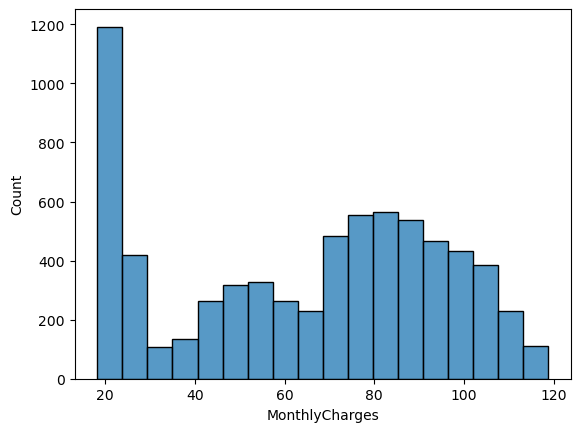

In [74]:
sns.histplot(df['MonthlyCharges'])
plt.show()

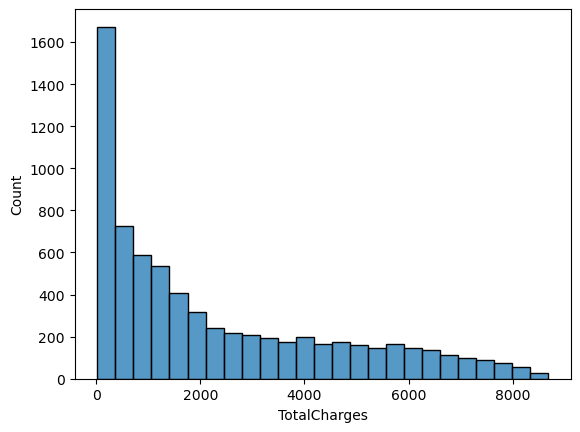

In [76]:
sns.histplot(df['TotalCharges'])
plt.show()

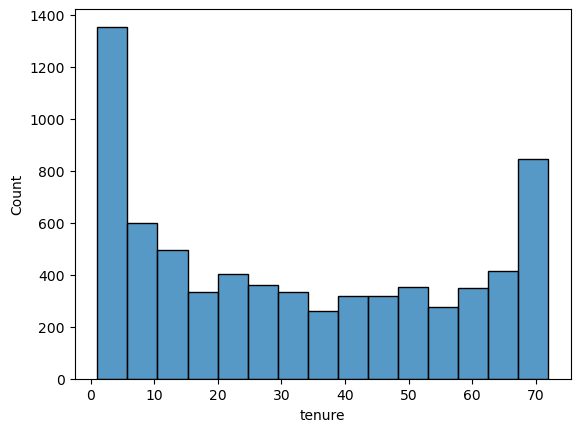

In [77]:
sns.histplot(df['tenure'])
plt.show()

In [71]:
df['gender'].value_counts()

gender
Male      3544
Female    3472
Name: count, dtype: int64

In [73]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2360
Mailed check                 1601
Bank transfer (automatic)    1538
Credit card (automatic)      1517
Name: count, dtype: int64

In [12]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

## 컬럼 삭제

In [13]:
#불필요한 컬럼 삭제 #NaN값이 너무 많음 
df = df.drop('DeviceProtection', axis=1)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,No,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## 컬럼 내용 변경하기

범주형 문자 데이터를 숫자 변환하는것은 성능에 많은 영향을 미치므로 꼭 변환한다.<br>
null, _ 같은 문제있는 문자 데이터를 모델링하기 전에 미리 다른 데이터로 변경, 혹은 삭제한다.

- TotalCharges 컬럼 타입 변경하기

In [81]:
df['TotalCharges']

1       1889.50
2        108.15
3       1840.75
4        151.65
5        820.50
         ...   
7037    1419.40
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
Name: TotalCharges, Length: 7016, dtype: float64

In [82]:
df['TotalCharges'].astype(float)

1       1889.50
2        108.15
3       1840.75
4        151.65
5        820.50
         ...   
7037    1419.40
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
Name: TotalCharges, Length: 7016, dtype: float64

In [15]:
#df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

- Churn 컬럼의 문자열값을 숫자로 변경

In [17]:
df['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [18]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [19]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,NaN,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,No,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0.0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0.0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1.0,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


## Null 데이터 확인

- 결측치 처리

데이터에 결측치 있으면 모델링시 알지 못하는 에러 발생할수 있으므로 반드시 결측치를 제거나 변경해야 한다.<br>
결측치 제거시 dropna() 함수 활용하면 된다.<br>
결측치를 변경시 변경하는 방법이 꼭 정답이 아니며, 여러가지 판단하고 고민이 필요하다.<br>
주로, 문자형 컬럼에 대해 최빈값으로 , 숫자형 컬럼에 대해 중간값으로 결측치 대신해서 채울수 있다.

In [20]:
df.isnull().sum()

customerID           0
gender               9
SeniorCitizen        1
Partner              0
Dependents           2
tenure               0
PhoneService         3
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             1
PaperlessBilling     0
PaymentMethod        1
MonthlyCharges       1
TotalCharges        11
Churn                0
dtype: int64

In [21]:
df = df.dropna()
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,No,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0.0,No,No,8,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,Female,0.0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0
7038,6840-RESVB,Male,0.0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0.0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0.0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0


# #4. 시각화

## 라이브러리 임포트

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

## Bar 차트

In [28]:
#sns.pairplot(df)

In [64]:
value_counts = df['Churn'].value_counts()
value_counts

Churn
0    5150
1    1866
Name: count, dtype: int64

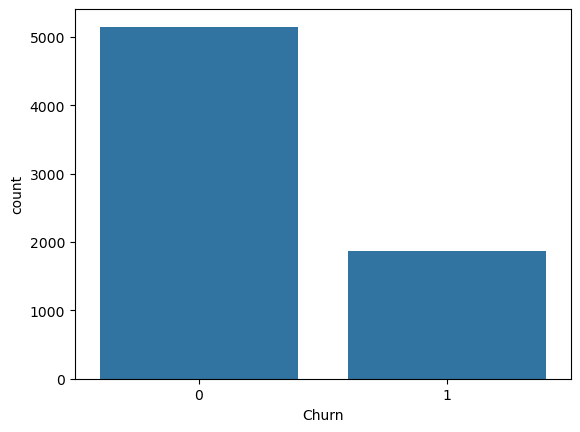

In [84]:
sns.countplot(data=df, x=df['Churn'])
plt.show()

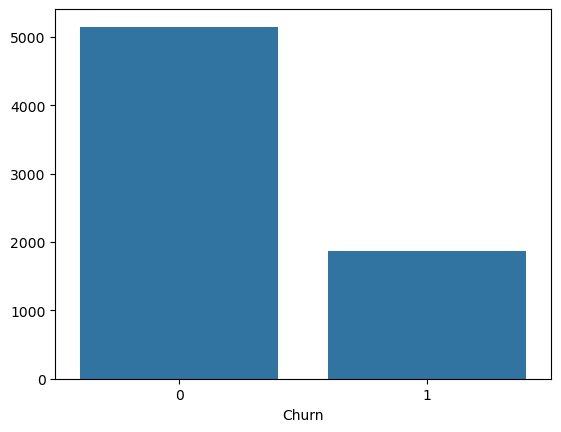

In [65]:
sns.barplot(x=value_counts.index, y=value_counts.values)

plt.show()

- 불균형 심한 PhoneService 컬럼 삭제

In [31]:
df.drop('PhoneService', axis=1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0.0,No,No,34,No,DSL,Yes,No,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0.0,No,No,2,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0.0,No,No,45,No phone service,DSL,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0.0,No,No,2,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0.0,No,No,8,Yes,Fiber optic,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,Female,0.0,No,No,72,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0
7038,6840-RESVB,Male,0.0,Yes,Yes,24,Yes,DSL,Yes,No,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0.0,Yes,Yes,72,Yes,Fiber optic,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0.0,Yes,Yes,11,No phone service,DSL,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0


## 숫자형 컬럼에 대한 시각화

- Churn 컬럼

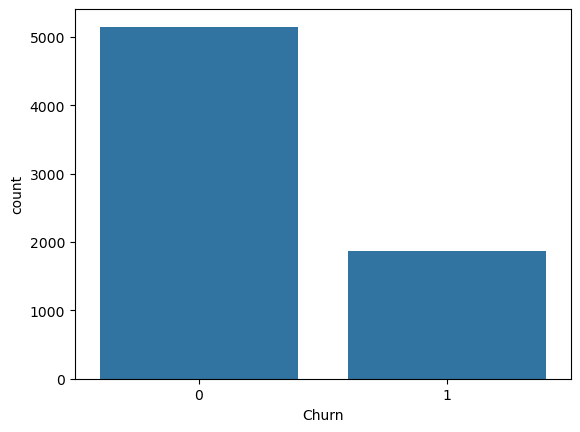

In [98]:
sns.countplot(data=df, x = df['Churn'])
plt.show()

#이탈율이 이탈하지 않은 그룹과 비교했을때 반 이하이다.  

- SeniorCitizen 컬럼

In [65]:
df['SeniorCitizen']

1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
       ... 
7037    0.0
7038    0.0
7039    0.0
7040    0.0
7041    1.0
Name: SeniorCitizen, Length: 7016, dtype: float64

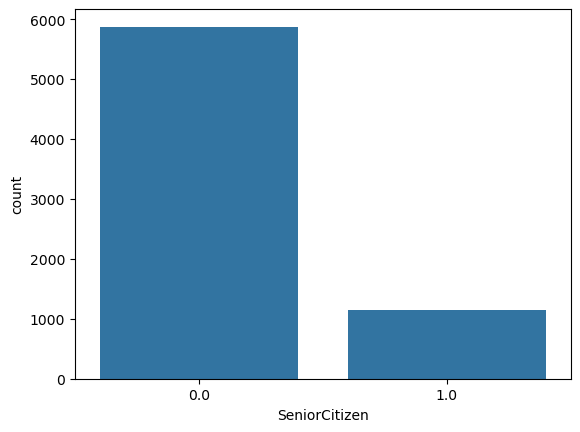

In [97]:
sns.countplot(data=df, x = df['SeniorCitizen'])
plt.show()

#대체적으로 고령자는 1000 명 정도로 아닌 그룹에 비교했을때 1/6 정도 이다.  

- Partner 컬럼

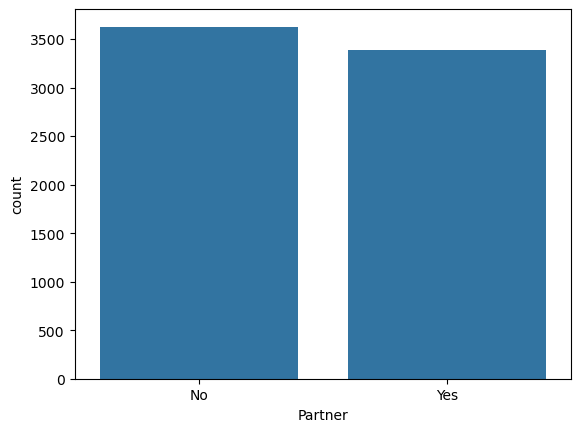

In [99]:
sns.countplot(data=df, x = df['Partner'])
plt.show()

#Partner 여부는 비슷하다 

- Dependents 컬럼

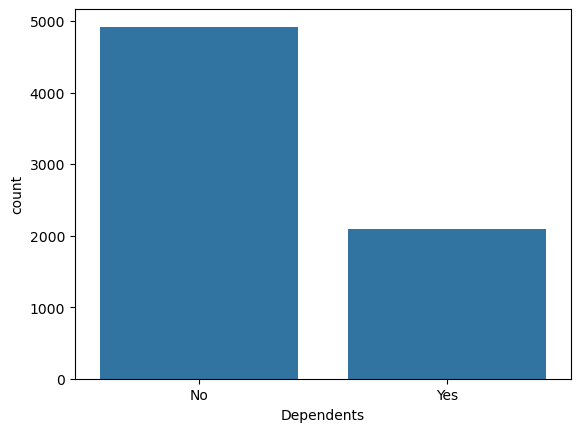

In [100]:
sns.countplot(data=df, x = df['Dependents'])
plt.show()

# 부양가족 아닌 그룹이 아닌 그룹에 비교해서 반 정도 많다. 

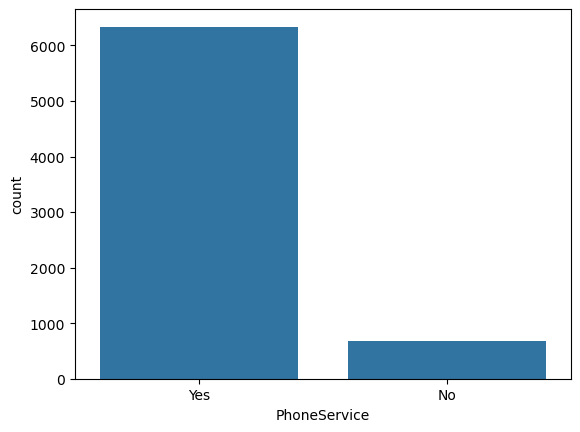

In [101]:
sns.countplot(data=df, x = df['PhoneService'])
plt.show()

# PhoneService 를 가지고 있는 사람들이 대략 1/6 더 많다 

In [ ]:
# seaborn 라이브러리 임포트
#!pip install seaborn

import seaborn as sns

## Histgram

- tenure 컬럼

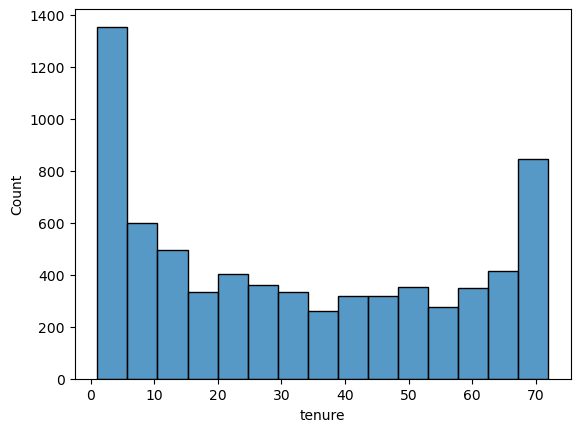

In [43]:
sns.histplot(data=df, x = df['tenure'])
plt.show()

- TotalCharges 컬럼

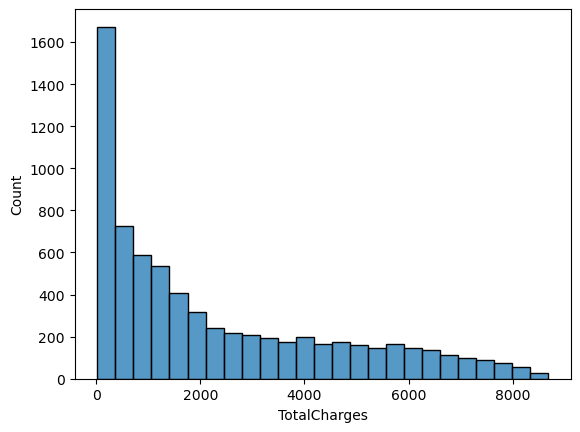

In [47]:
sns.histplot(data=df, x = df['TotalCharges'])
plt.show()

## Countplot

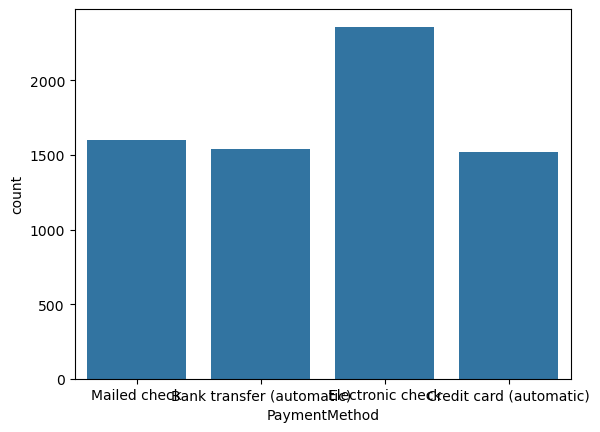

In [106]:
sns.countplot(data=df, x = df['PaymentMethod'])
plt.show()

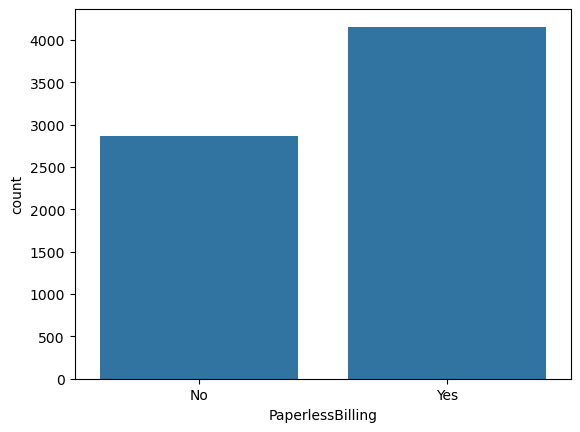

In [107]:
sns.countplot(data=df, x = df['PaperlessBilling'])
plt.show()

## boxplot

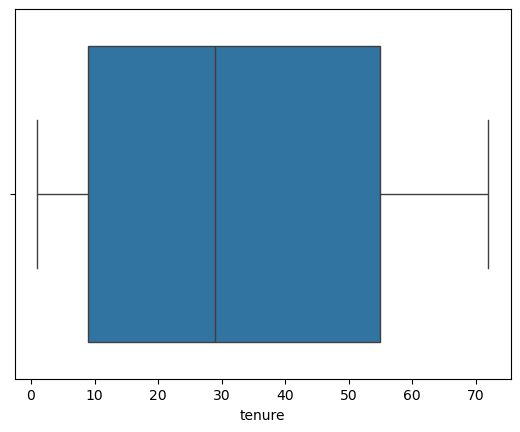

In [44]:
sns.boxplot(data=df, x = df['tenure'])
plt.show()

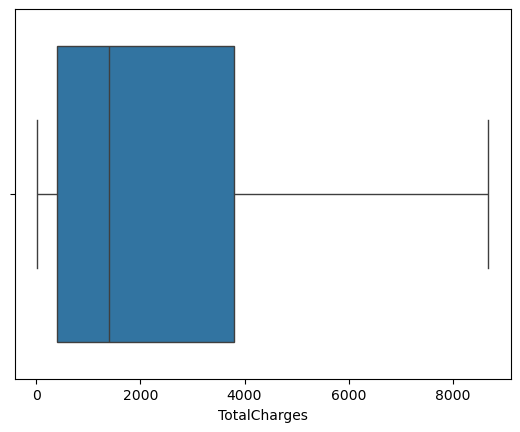

In [48]:
sns.boxplot(data=df, x = df['TotalCharges'])
plt.show()

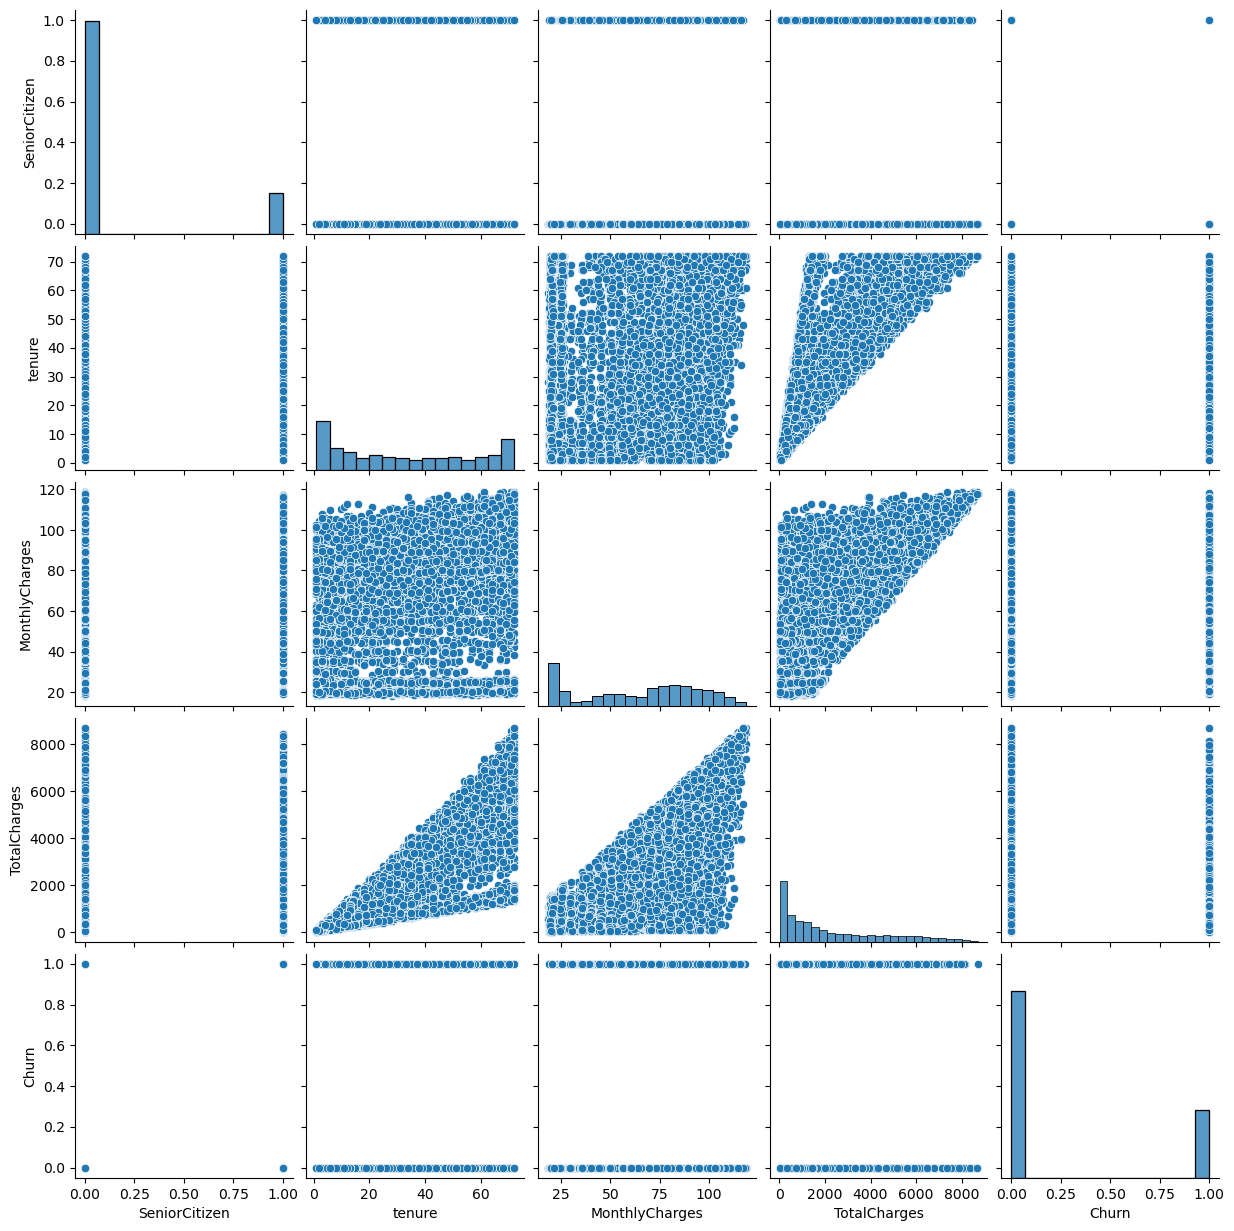

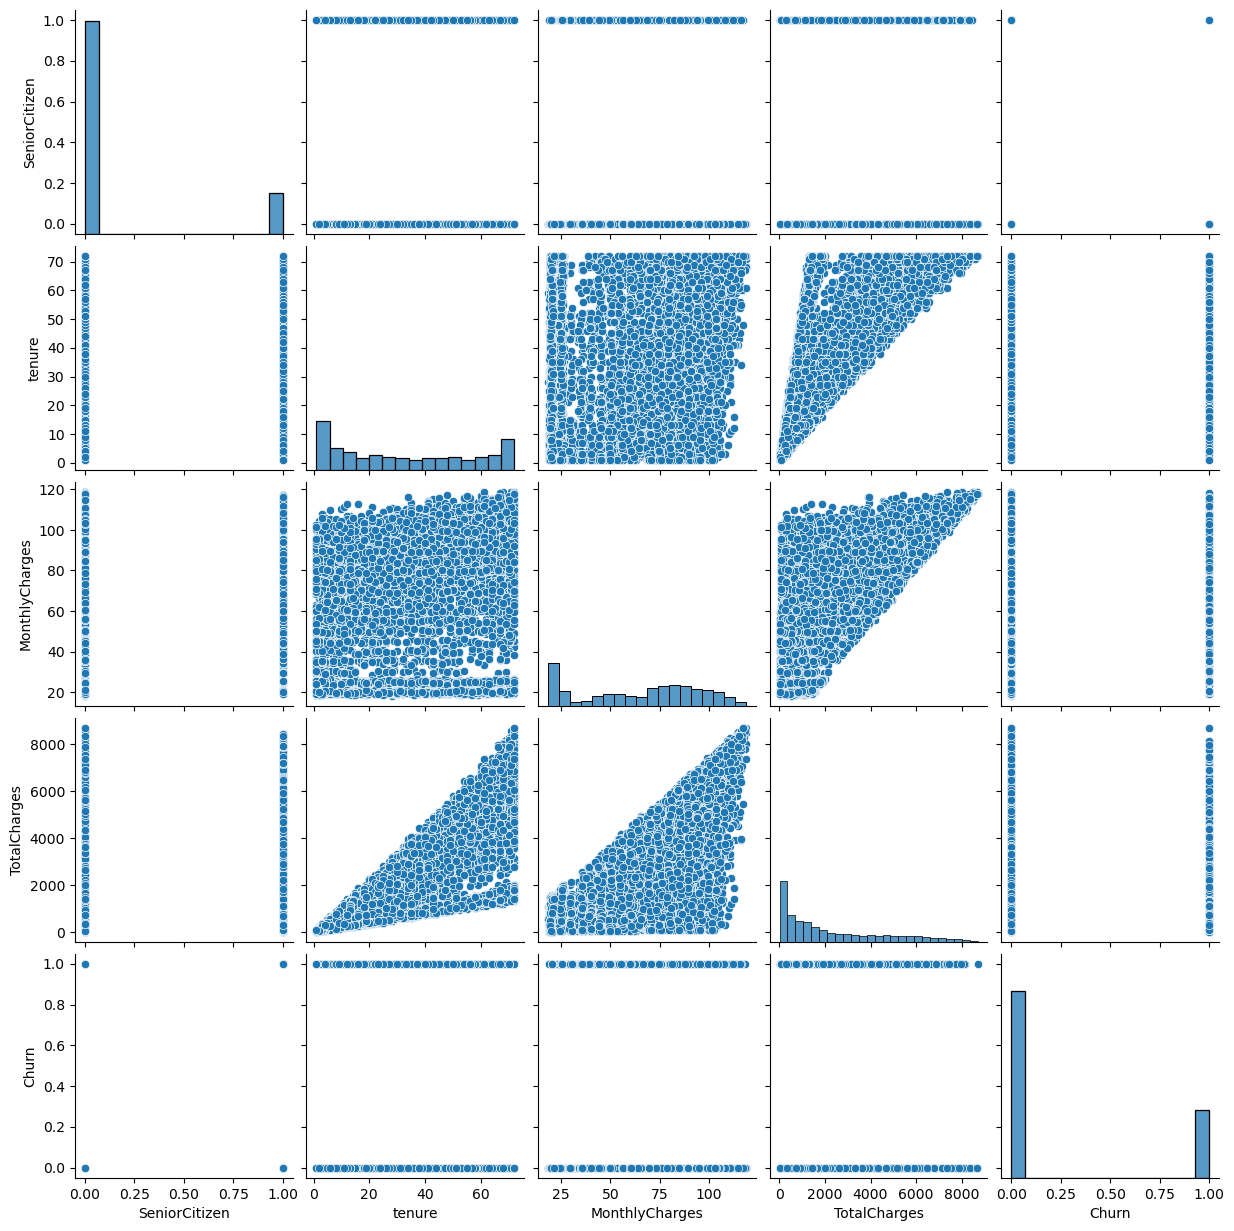

In [53]:
sns.pairplot(df)
plt.show()

## Scatter

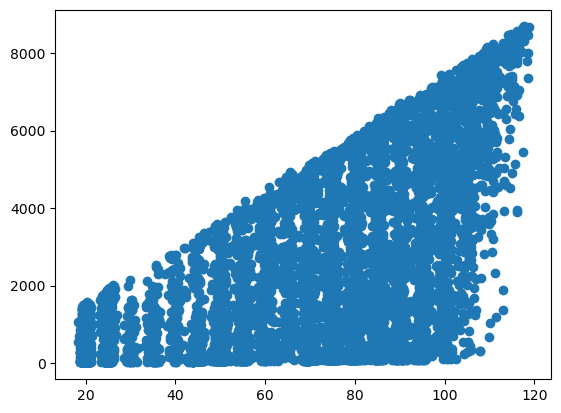

In [95]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.scatter(df['MonthlyCharges'],df['TotalCharges']) #총 지불 금액과 팁의 관계 '상관관계'
plt.show()

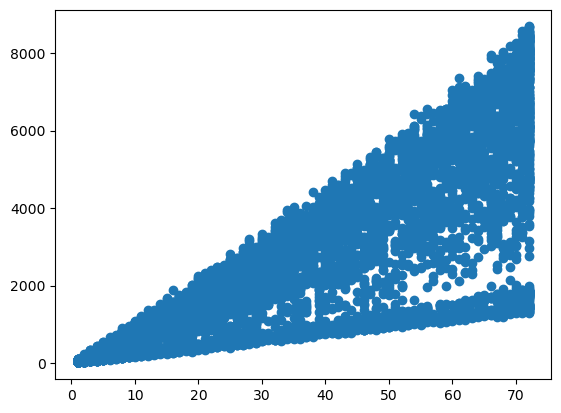

In [111]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.scatter(df['tenure'], df['TotalCharges']) #총 지불 금액과 팁의 관계 '상관관계'
plt.show()

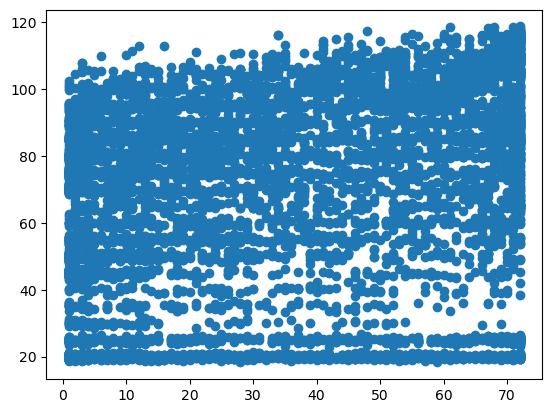

In [112]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.scatter(df['tenure'], df['MonthlyCharges']) #총 지불 금액과 팁의 관계 '상관관계'
plt.show()

## heatmap

In [56]:
df_matrix = df.corr(numeric_only  = True)
df_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.015463,0.219949,0.102326,0.150536
tenure,0.015463,1.000000,0.246587,0.825873,-0.354249
MonthlyCharges,0.219949,0.246587,1.000000,0.650939,0.192586
TotalCharges,0.102326,0.825873,0.650939,1.000000,-0.199547
Churn,0.150536,-0.354249,0.192586,-0.199547,1.000000


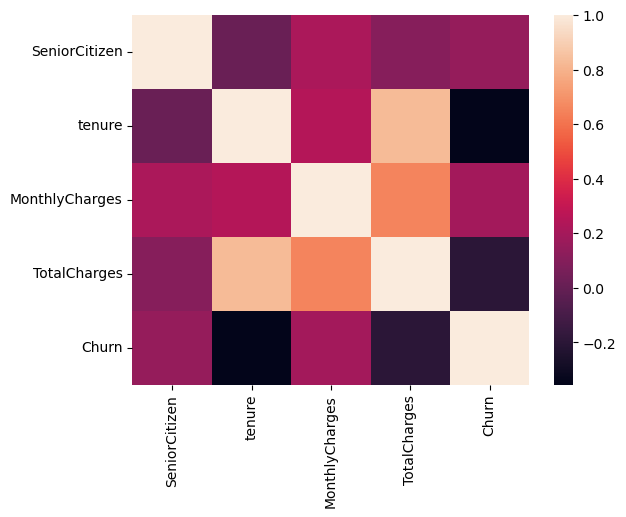

In [58]:
sns.heatmap(df_matrix)
plt.show()

# # 5. 결과 저장하기

## 결과를 csv 파일로 저장하기

In [85]:
df.to_csv('통신사고객이탈.csv', index = False)

# #X. 랩업
1. 필요 라이브러리 임포트 및 파일 읽어오기 : pd.read_csv()
2. EDA (Exploratory Data Analysis) 탐색적 데이터 분석 : df.info(), df.head(), df.tail()
3. 데이터 전처리 수행
 + 불필요 컬럼 삭제 : df.drop()
 + 컬럼 내용 변경하기 : df.replace()
 + Null 처리 : df.replace(), df.fillna()
 + 컬럼 type 변경하기 : df['col'].astype(int)
4. 시각화
 + matplotlib, seaborn
 + bar, scatter, countplot, boxplot
5. 결과 저장하기
 + to_csv()